In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import nibabel as nib 
import glob

df=pd.read_table('~/GIT/lesion_predictions/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm_LBM.csv', header=0, delimiter=',')
sub_left=df['LESIONED_HEMISPHERE']

# load SMATT
smatt_dir= '/Users/emilyolafson/GIT/lesion_predictions/smatt-template/'
smatt_files = glob.glob(smatt_dir + '*.nii')

smatts = [smatt.replace(smatt_dir, '').replace('-S-MATT.nii', '') for smatt in smatt_files]
smatts.remove('S-MATT.nii')
smatts.sort()

mni = nib.load('/Users/emilyolafson/fsl/data/standard/MNI152_T1_1mm_brain.nii.gz').get_fdata()

LM1_CST = nib.load(smatt_dir + 'Left-M1-S-MATT.nii').get_fdata()
RM1_CST = nib.load(smatt_dir + 'Right-M1-S-MATT.nii').get_fdata()

lesion_folder = '/Users/emilyolafson/GIT/lesion_predictions/all_lesionmasks_2009tov6_usingSym_rename/'

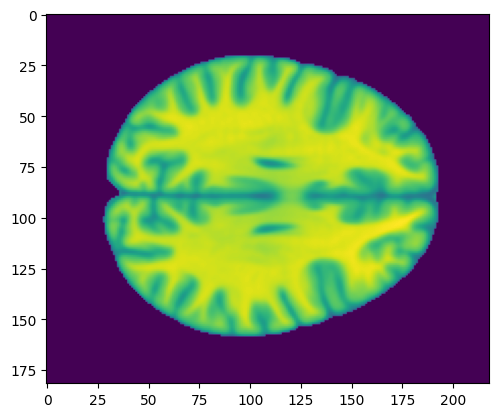

In [3]:
plt.imshow(mni[:,:,100])

In [34]:
def find_max_overlap(lesion, CST):
    max_overlap=0
    for z in np.arange(0,182):
        lesion_slice = lesion[:,:,z]
        cst_slice = CST[:,:,z]
        if np.count_nonzero(cst_slice)>0:
            lesion_overlap = np.count_nonzero(lesion_slice*cst_slice)/np.count_nonzero(cst_slice)
            if lesion_overlap > max_overlap:
                max_overlap = lesion_overlap

    return max_overlap

In [19]:
df['max_overlap']=np.zeros(df.shape[0])

In [35]:
#calculate the max % overlap on the transverse plane with the binarized CST.
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata()

    print(df.loc[df.index[sub],'BIDS_ID'])
    if sub_left[sub]==1: #left
        max_overlap = find_max_overlap(lesion, LM1_CST)

    if sub_left[sub]==2: #right
        max_overlap = find_max_overlap(lesion, RM1_CST)

    if sub_left[sub]==3 or sub_left[sub]==4 or  sub_left[sub]==5 or  sub_left[sub]==6:
        max_overlap_L = find_max_overlap(lesion, LM1_CST)
        max_overlap_R = find_max_overlap(lesion, RM1_CST)
        max_overlap = np.max((max_overlap_L, max_overlap_R))

    df.loc[df.index[sub],'max_overlap'] = max_overlap


sub-r001s001
sub-r001s002
sub-r001s003
sub-r001s004
sub-r001s005
sub-r001s006
sub-r001s007
sub-r001s008
sub-r001s009
sub-r001s010
sub-r001s011
sub-r001s012
sub-r001s013
sub-r001s014
sub-r001s015
sub-r001s016
sub-r001s017
sub-r001s018
sub-r001s019
sub-r001s020
sub-r001s021
sub-r001s022
sub-r001s023
sub-r001s024
sub-r001s025
sub-r001s026
sub-r001s027
sub-r001s028
sub-r001s029
sub-r001s030
sub-r001s031
sub-r001s032
sub-r001s033
sub-r001s034
sub-r001s036
sub-r001s037
sub-r001s038
sub-r001s039
sub-r001s040
sub-r002s001
sub-r002s002
sub-r002s003
sub-r002s004
sub-r002s005
sub-r002s006
sub-r002s007
sub-r002s008
sub-r002s009
sub-r002s010
sub-r002s011
sub-r002s012
sub-r003s001
sub-r003s002
sub-r003s003
sub-r003s004
sub-r003s005
sub-r003s006
sub-r003s007
sub-r003s008
sub-r003s009
sub-r003s010
sub-r003s011
sub-r003s012
sub-r003s013
sub-r003s014
sub-r003s015
sub-r004s001
sub-r004s002
sub-r004s003
sub-r004s005
sub-r004s006
sub-r004s007
sub-r004s008
sub-r004s009
sub-r004s010
sub-r004s011
sub-r004s012

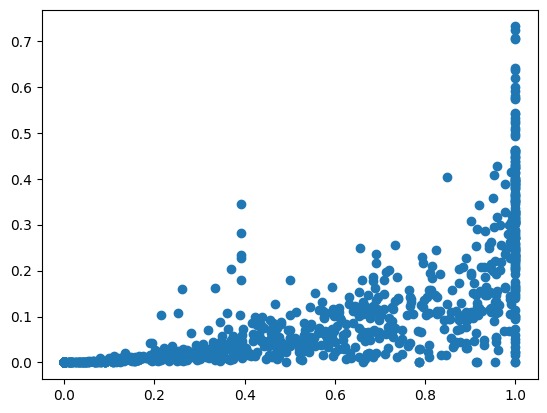

In [30]:
plt.scatter(df['max_overlap'],df['M1_CST'])

In [33]:
df['M1_CST'].corr(df['max_overlap'])

0.7377361431966425

In [36]:
df.to_csv('/Users/emilyolafson/GIT/Behaviour_Information_ALL_April7_2022_sorted_CST_12_ll_slnm_LBM_maxoverlap.csv')